# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.7.0'

In [3]:
tf.keras.__version__

'2.7.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

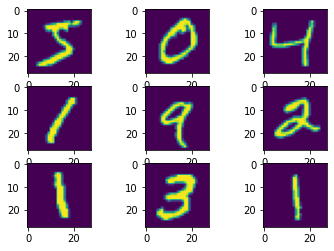

(60000, 28, 28)

In [4]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

X_train_full.shape

In [5]:
# standardisation (we divide by 255 which is the max value for the grayscale images)
X_train_full_norm = X_train_full/255.
X_test_norm = X_test/255. 

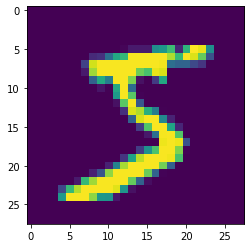

In [6]:
plt.imshow(X_train_full[0])

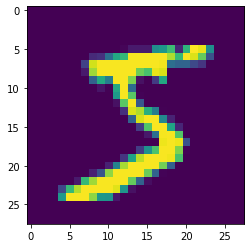

In [7]:
plt.imshow(X_train_full_norm[0])

In [8]:
# before normalisation
print(X_train_full[0].min())
print(X_train_full[0].max())

0
255


In [9]:
#after normalisation
print(X_train_full_norm[0].min())
print(X_train_full_norm[0].max())

0.0
1.0


In [10]:
print(y_train_full)

[5 0 4 ... 5 6 8]


(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

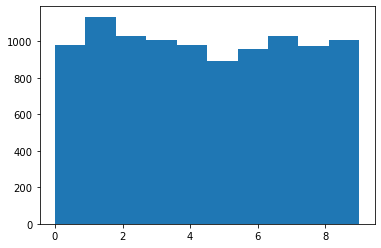

In [11]:
plt.hist(y_test)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

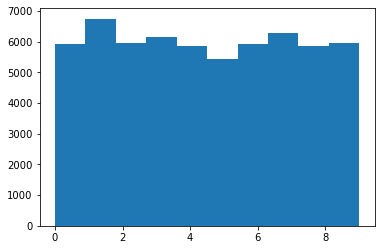

In [12]:
plt.hist(y_train_full)

In [13]:
from keras.utils import np_utils

In [14]:
y_train = np_utils.to_categorical(y_train_full)

In [15]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_test = np_utils.to_categorical(y_test)

In [18]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [20]:
np.random.seed(42) 
shuffled_indices = np.random.permutation(X_train_full_norm.shape[0])
X_valid, X_train = X_train_full_norm[shuffled_indices[:5000]], X_train_full_norm[shuffled_indices[5000:]]
y_valid, y_train = y_train[shuffled_indices[:5000]], y_train[shuffled_indices[5000:]]

## Build and train the model

Build and train your model. 

In [21]:
from keras.models import Sequential

In [22]:
from keras.layers.core import Dense, Activation

In [23]:
X_train=X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test_norm=X_test_norm.reshape(X_test_norm.shape[0], X_test_norm.shape[1]*X_test_norm.shape[2])
X_valid=X_valid.reshape(X_valid.shape[0], X_valid.shape[1]*X_valid.shape[2])

In [24]:
X_train.shape

(55000, 784)

In [25]:
#activation='sigmoid'
activation='relu'
inputDim=X_train.shape[1]

In [26]:
# TODO: Build your model

# model = Sequential()
# model.add(Dense(256, input_dim=inputDim))
# model.add(Activation(activation))
# model.add(Dense(128))
# model.add(Activation(activation))
# model.add(Dense(10))
# model.add(Activation('softmax'))

model = Sequential()
model.add(Dense(512, input_dim=inputDim))
model.add(Activation(activation))
model.add(Dense(256))
model.add(Activation(activation))
model.add(Dense(128))
model.add(Activation(activation))

model.add(Dense(10))
model.add(Activation('softmax'))

In [27]:
# show the structure of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
y_train.shape

(55000, 10)

In [30]:
y_valid.shape

(5000, 10)

In [31]:
history=model.fit(X_train, y_train, batch_size=64, epochs=7, validation_data=(X_valid,y_valid), verbose=2)

Epoch 1/7
860/860 - 9s - loss: 0.2140 - accuracy: 0.9361 - val_loss: 0.0933 - val_accuracy: 0.9712 - 9s/epoch - 11ms/step
Epoch 2/7
860/860 - 9s - loss: 0.0876 - accuracy: 0.9726 - val_loss: 0.1047 - val_accuracy: 0.9678 - 9s/epoch - 10ms/step
Epoch 3/7
860/860 - 7s - loss: 0.0590 - accuracy: 0.9813 - val_loss: 0.0844 - val_accuracy: 0.9746 - 7s/epoch - 8ms/step
Epoch 4/7
860/860 - 6s - loss: 0.0445 - accuracy: 0.9857 - val_loss: 0.0986 - val_accuracy: 0.9732 - 6s/epoch - 7ms/step
Epoch 5/7
860/860 - 12s - loss: 0.0341 - accuracy: 0.9887 - val_loss: 0.0979 - val_accuracy: 0.9732 - 12s/epoch - 14ms/step
Epoch 6/7
860/860 - 11s - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0855 - val_accuracy: 0.9786 - 11s/epoch - 13ms/step
Epoch 7/7
860/860 - 7s - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0746 - val_accuracy: 0.9800 - 7s/epoch - 9ms/step


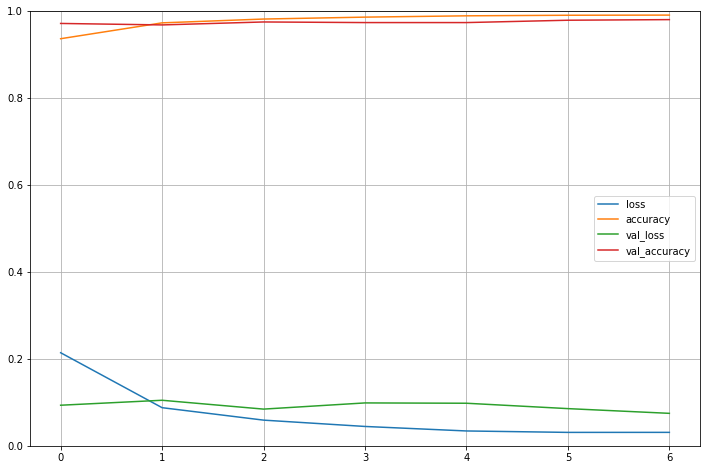

In [32]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [33]:
# y_pred = np.argmax(model.predict(X_test_norm[:3]), axis=-1)
# print(y_pred)
# print("Prediction: ", [class_names[i] for i in y_pred])

## Save the model

In [34]:
model.save('FDS21-M102-mnist.h5') 

## Load the model and evaluate it on the test data

In [35]:
model = keras.models.load_model("FDS21-M102-mnist.h5")
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0683 - accuracy: 0.9805


[0.06827402859926224, 0.9804999828338623]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.

First I did the standardization/normalization. Then I modified Y_test to to_categorical (convert a class vector to one-hot encoding matrix. I shuffled the data and created a valid dataset. I reshaped the diferent datasets (X_Train, X_test_norm, X_valid).

I did everything above before building the model. 

For my model I built 4 Dense layers and 4 activation function after each layer. The first 3 one are relu functions and the last one a softmax function. This was best intuition and I got above 0.98 accuracy. I did 6 epochs and I had a batch size of 64. With 8 epochs my result is slightly lower (0.9773). With a smaller batch size of 32 and 6 epochs my accuracy was 0.9822, so it was a bit better. With 5 epochs it does not make much difference (0.9819 accuracy)
I wanted a less complex model so I took off one dense layer and one activation function. As a result my accuracy was sligthly lower (0.9788). With a higher batch size, y result is slightly lower too (0.9779)
After I built 5 Dense layers and 4 activation function after each layer. The first 4 one are relu functions and the last one a softmax function. My accuracy was sligthly lower (0.9775). 

At the end I did it with 7 epochs and a batch size of 64. I got more than 0.98 accuracy.

To conclude I did not get any difficulties for this part. I got more than 0.97 accuracy at the first try.


